In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

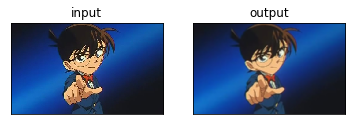

In [5]:
# 图像平滑  使用低通道滤波器对图像进行模糊   自定义滤波器进行卷积(2D卷积)
# 和一维信号一样，对2D图像使用低通滤波LPF去除噪音，模糊图像，高通滤波HPF找到图像边缘
img = cv2.imread('kenan.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
kernel = np.ones((5,5),np.float32)/25 # 奇数滤波大小 保证锚点在中间，方便模块中心滑动卷积，padding保证对称
dest = cv2.filter2D(img,-1,kernel) # 滤波操作,去除噪音 即高频、边界部分
plt.subplot(121),plt.imshow(img),plt.title('input'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dest),plt.title('output'),plt.xticks([]),plt.yticks([])
plt.show()

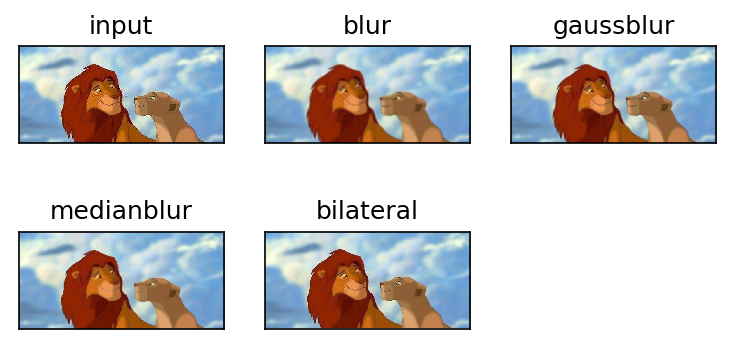

In [22]:
# 平均  归一化卷积操作   cv2.blur()或cv2.boxFilter(normalize=False是否归一化)
# 高斯滤波 中间大两边小
img = cv2.imread('lion.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
blur = cv2.blur(img,(5,5))  # 归一滤波 值都是1
gauss = cv2.GaussianBlur(img,(5,5),0) # 高斯滤波 高斯分布的值 效果明显好多啦
median = cv2.medianBlur(img,5) # 中值模糊
# 9为邻域直径 两个75分别为空间高斯标准差  灰度值相似性高斯函数标准差
bilateral = cv2.bilateralFilter(img,9,75,75) # 双边滤波 考虑像素空间高斯加权和值高斯加权
plt.figure(figsize=(6,3),dpi=150)
plt.subplot(231),plt.imshow(img),plt.title('input'),plt.xticks([]),plt.yticks([])
plt.subplot(232),plt.imshow(blur),plt.title('blur'),plt.xticks([]),plt.yticks([])
plt.subplot(233),plt.imshow(gauss),plt.title('gaussblur'),plt.xticks([]),plt.yticks([])
plt.subplot(234),plt.imshow(median),plt.title('medianblur'),plt.xticks([]),plt.yticks([])
plt.subplot(235),plt.imshow(bilateral),plt.title('bilateral'),plt.xticks([]),plt.yticks([]) 
plt.show()

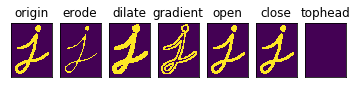

In [18]:
# 形态学转换 erode腐蚀  dilate膨胀
# 卷积核腐蚀图像
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
# 上边的核实正方形，下面有椭圆形和十字形
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))#椭圆形
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) # 十字形
# 一般去噪时先腐蚀再膨胀
erosion = cv2.erode(img,kernel,iterations = 1) #分开物体 卷积核对应区域全为1才为1
dilate = cv2.dilate(img,kernel,iterations=1) #连接物体 卷积核区域有任一个为1则为1
# cv2.imshow('lion',erosion)
open = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
tophead = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel) # 开运算图像与原图之差
"""
开运算：先腐蚀再膨胀  可以去除噪声  opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
闭运算：先膨胀再腐蚀   可以去除黑点 closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
形态学梯度：腐蚀和膨胀的差别 轮廓
"""
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
plt.subplot(172),plt.imshow(erosion),plt.xticks([]),plt.yticks([]),plt.title('erode')
plt.subplot(171),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('origin')
plt.subplot(173),plt.imshow(dilate),plt.xticks([]),plt.yticks([]),plt.title('dilate')
plt.subplot(174),plt.imshow(gradient),plt.xticks([]),plt.yticks([]),plt.title('gradient')
plt.subplot(175),plt.imshow(open),plt.xticks([]),plt.yticks([]),plt.title('open')
plt.subplot(176),plt.imshow(close),plt.xticks([]),plt.yticks([]),plt.title('close')
plt.subplot(177),plt.imshow(tophead),plt.xticks([]),plt.yticks([]),plt.title('tophead')
plt.show()

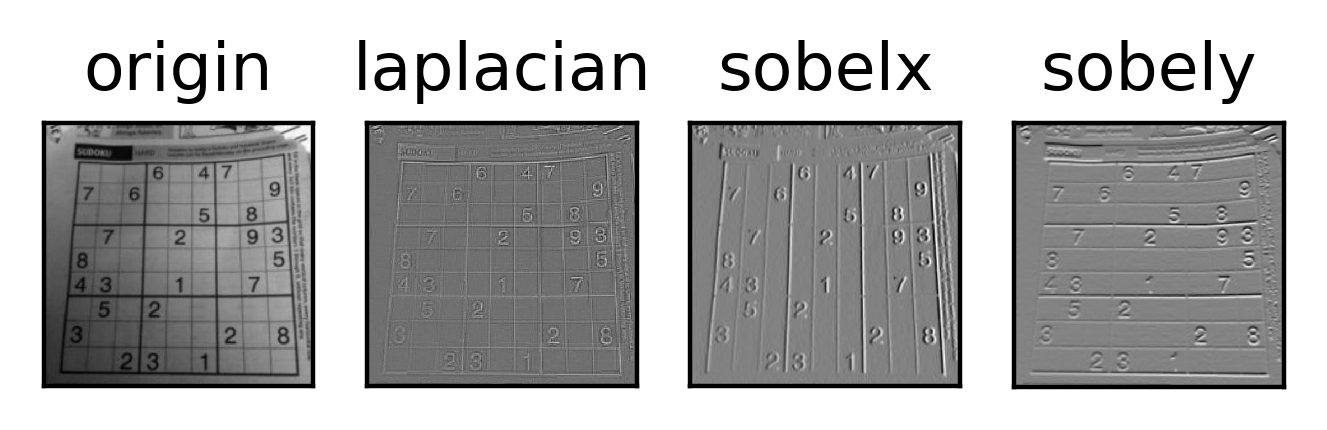

In [40]:
# 图像梯度  高斯滤波器
# sobel() schar() 对应一阶或二阶导数 schar是对sobel的优化 laplacian() 二阶导数
img = cv2.imread('gradient.JPG',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=3)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(4,2),dpi=400)
plt.subplot(141),plt.imshow(img,cmap='gray'),plt.title('origin'),plt.xticks([]),plt.yticks([])
plt.subplot(142),plt.imshow(laplacian,cmap='gray'),plt.title('laplacian'),plt.xticks([]),plt.yticks([])
plt.subplot(143),plt.imshow(sobelx,cmap='gray'),plt.title('sobelx'),plt.xticks([]),plt.yticks([])
plt.subplot(144),plt.imshow(sobely,cmap='gray'),plt.title('sobely'),plt.xticks([]),plt.yticks([])
plt.show()